In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('final_dataset.csv')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
# CSV 파일을 읽어들입니다.
df = pd.read_csv('final_dataset.csv')

# 특성과 레이블을 분리합니다.
X = df.drop('label', axis=1).values  # 특성 데이터
y = df['label'].values  # 레이블 데이터

# 훈련 세트와 나머지(검증+테스트) 세트로 분할합니다. (80% : 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 나머지 데이터를 검증 세트와 테스트 세트로 분할합니다. (50% : 50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 분할된 데이터 세트의 크기를 출력합니다.
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 분할된 데이터 세트의 레이블 분포를 출력합니다.
print(f"Train set label distribution: {np.bincount(y_train.astype(int))}")
print(f"Validation set label distribution: {np.bincount(y_val.astype(int))}")
print(f"Test set label distribution: {np.bincount(y_test.astype(int))}")

Train set: 3809 samples
Validation set: 476 samples
Test set: 477 samples
Train set label distribution: [1907 1902]
Validation set label distribution: [238 238]
Test set label distribution: [239 238]


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

Accuracy: 0.8487

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       238
           1       0.80      0.92      0.86       238

    accuracy                           0.85       476
   macro avg       0.86      0.85      0.85       476
weighted avg       0.86      0.85      0.85       476



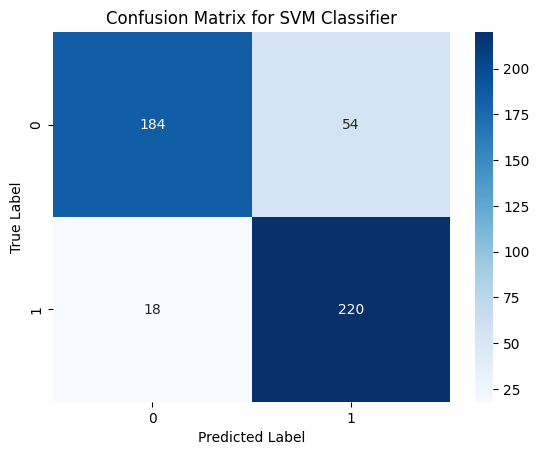

In [11]:
# SVM 분류기 인스턴스를 생성합니다.
svm_classifier = SVC(kernel='linear', random_state=42)

# 훈련 세트를 이용해 모델을 훈련합니다.
svm_classifier.fit(X_train, y_train)

# 검증 세트를 이용해 예측을 수행합니다.
y_pred = svm_classifier.predict(X_val)

# 정확도를 계산하고 출력합니다.
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 분류 리포트를 생성하고 출력합니다.
class_report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(class_report)

# 혼동 행렬을 생성하고 시각화합니다.
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()
